<a href="https://colab.research.google.com/github/brunobf09/Churn-Prediction-para-uma-empresa-de-Telecomunica-es/blob/main/%5BPROJETO%5D_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction
por: Bruno Brasil


---

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import jointplot
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
import xgboost
warnings.filterwarnings("ignore")

# importar os dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Undertanding

In [ ]:
#  Instalando pandasprofiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     / 38.5MB 754kB/s
     |████████████████████████████████| 10.1MB 23.8MB/s 
     |████████████████████████████████| 645kB 41.6MB/s 
     |████████████████████████████████| 112kB 35.6MB/s 
     |████████████████████████████████| 1.1MB 26.7MB/s 
     |████████████████████████████████| 3.1MB 35.6MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 296kB 60.7MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.


In [ ]:
#  Importas pandas profiling
from pandas_profiling import ProfileReport

# criar ProfileReport
report = ProfileReport(df)
# criar relatório html
report.to_file("report.html")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Informações relevantes do Pandas profiling:


*   Alta correlação entre Phone service e Multiple lines
*   Alta cardinalidade de custumerID e TotalCharge
*   TotalCharge é um valor que pode ser obtido com tenure e MonthlyCharges.
*   Existem dados incoerêntes em TotalCharges
*   Não há dados ausentes e nem duplicados




In [ ]:
# Corrigindo TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges.replace(' ',0))

In [ ]:
# Verificando motivo do erro
df[df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


Percebe-se que TotalCharges apresentava valor nulo porque esses clientes não tinham completado um mês e não tinham feito nenhum pagamento ainda. Além disso é possível perceber que nenhum deles abandonou a empresa. Por não terem nem ao menos um mês, e sabe-se que muitas das promoções de serviço conteplam um mês de uso gratuito, essas linhas serão excluídas, pois não geram valor para nossa análise.

Assim como essas linhas, iremos excluir `customerID` por se tratar de uma variável com alta cardinalidade que não gera valor.

In [ ]:
#Identificando linhas
df[df.TotalCharges == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
# Excluíndo linhas com TotalCharges igual a 0
df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], inplace=True)
df.drop('customerID',axis=1,inplace=True) 

Para começar nossa análise, vamos verificar a distribuição dos dados categóricos.



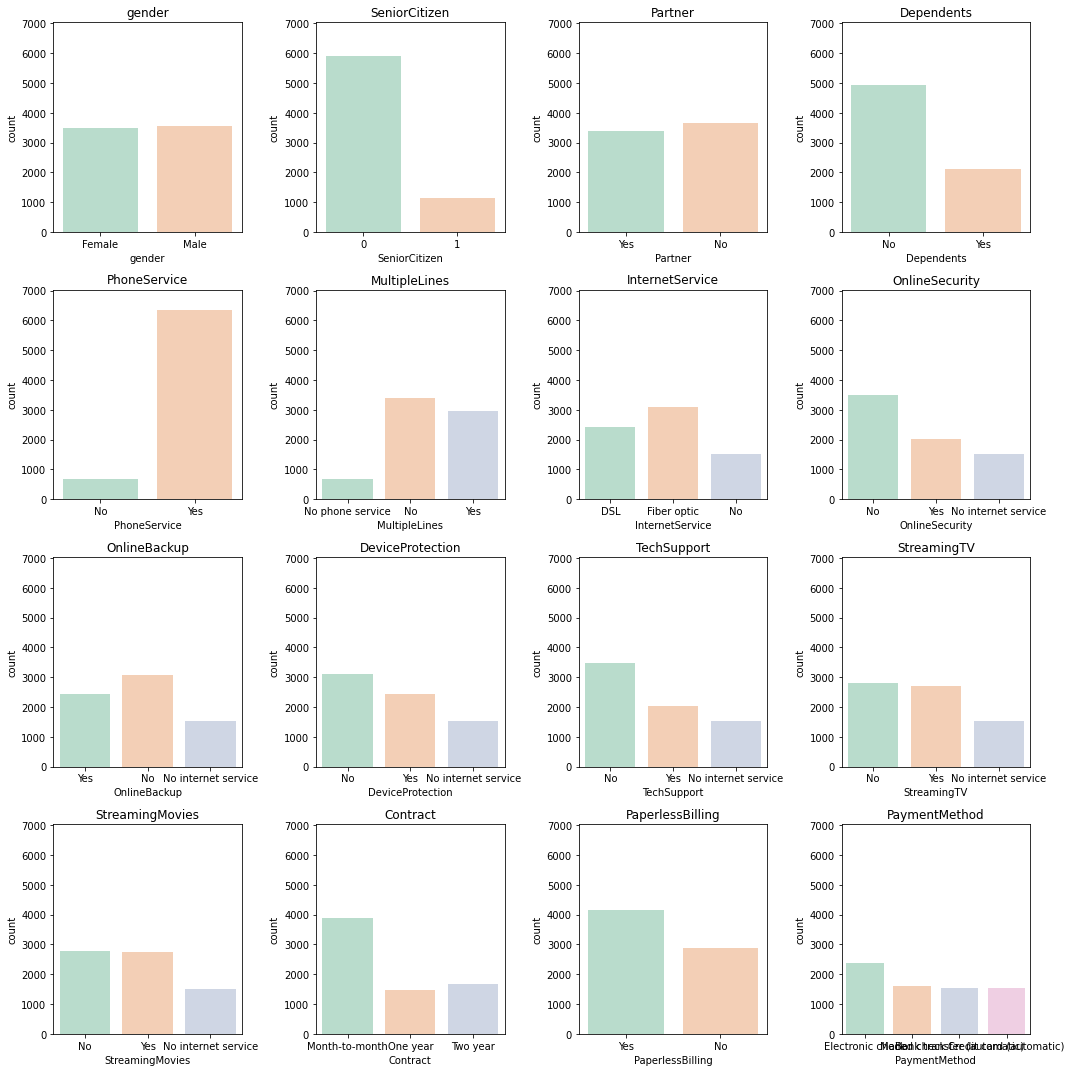

In [ ]:
# Criando barplots para dados categóricos
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
titles = [f for f in df.columns if f not in ('tenure')]

ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    sns.countplot(x=''.join(title.split()), data=df, palette='Pastel2', ax=ax)
    ax.set_title(title)
    ax.set_ylim(0, 7032)

plt.tight_layout()

É possível observar uma distribuição equilibrada em algumas *features* como `gender` e `Partner` e algumas outras bem desequilibradas como `SeniorCitize` e `PhoneService`.

Distribuição da variável alvo:

Proporção da variável No e Yes: 2.762


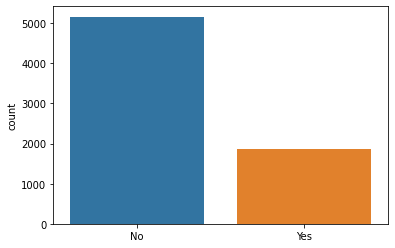

In [ ]:
#  Barplot para Churn
sns.countplot(df.Churn.values);

# Proporção da variável Churn
estimate = df.Churn[df.Churn=="No"].count() / df.Churn[df.Churn=="Yes"].count()
print('Proporção da variável No e Yes: %.3f' % estimate)

Como podemos ver, temos um *dataset* onde a variável alvo apresenta um desequilíbrio de 2.7 vezes o valore *No* comparado com *Yes*. Sabendo disso, nossa melhor métrica de avaliação passa ser a AUC (Area Under the ROC Curve) e não mais acurácia. Em avalição do modelo voltaremos nesse assunto.

Análise das variáveis numéricas:

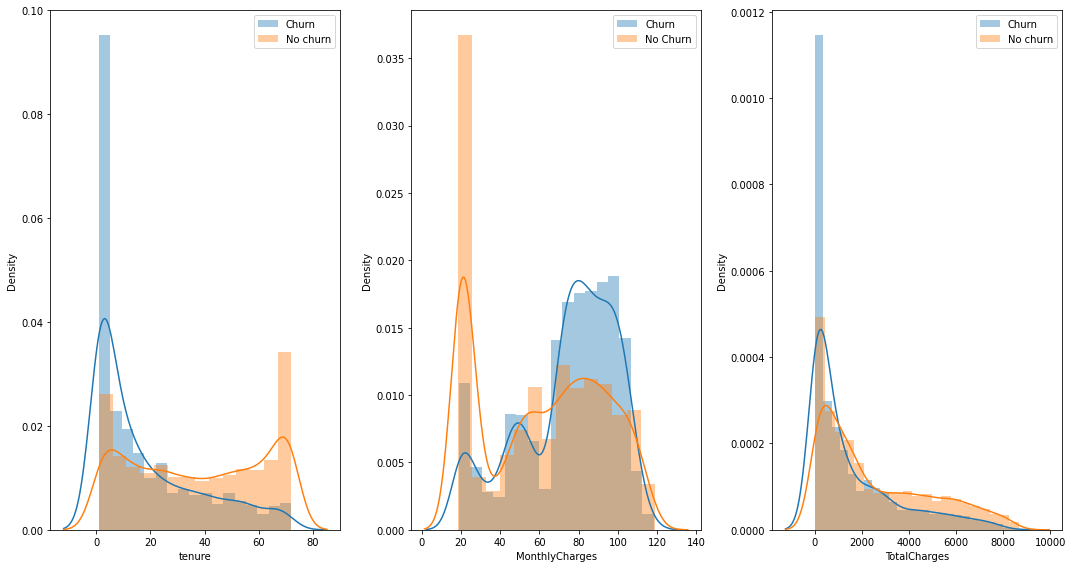

In [ ]:
# Histogramas para varíaveis numéricas
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,8))
fig.subplots_adjust(hspace=1, wspace=1)
mask = df.Churn == 'Yes'

plt.subplot(1, 3, 1)
ax1 = sns.distplot(df[mask].tenure,  label = 'Churn')
ax1 = sns.distplot(df[~mask].tenure, label = 'No churn')
ax1.legend()

plt.subplot(1, 3, 2)
ax2 = sns.distplot(df[mask].MonthlyCharges,  label = 'Churn')
ax2 = sns.distplot(df[~mask].MonthlyCharges, label = 'No Churn')
ax2.legend()
plt.tight_layout()

plt.subplot(1, 3, 3)
ax3 = sns.distplot(df[mask].TotalCharges,  label = 'Churn')
ax3 = sns.distplot(df[~mask].TotalCharges, label = 'No churn')
ax3.legend()
plt.tight_layout()

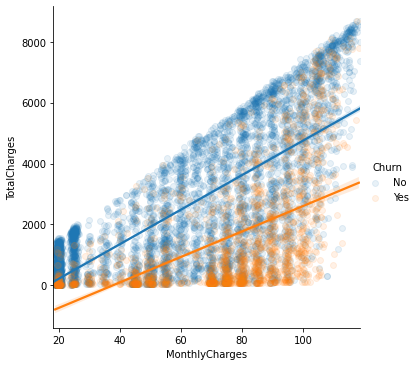

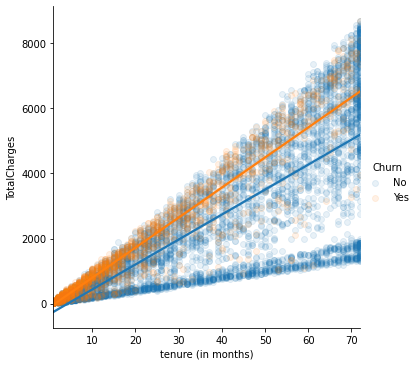

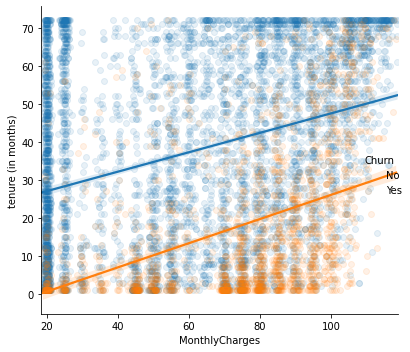

In [ ]:
#ScatterPlot para análise das variáveis numéricas

ax1 = sns.lmplot('MonthlyCharges', 'TotalCharges', data=df, hue='Churn',
           scatter_kws={'alpha': 0.1})

ax2 = sns.lmplot('tenure', 'TotalCharges', data=df, hue='Churn',
                 scatter_kws={'alpha': 0.1})
ax2.set_xlabels('tenure (in months)')

ax3 = sns.lmplot('MonthlyCharges', 'tenure', data=df, hue='Churn',
           scatter_kws={'alpha': 0.1})
ax3.set_ylabels('tenure (in months)')

plt.tight_layout()

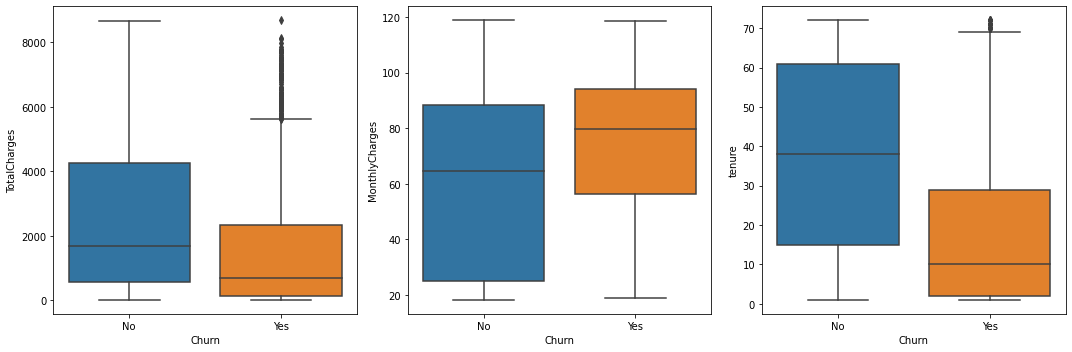

In [ ]:
# Boxplot com Churn e variáveis numéricas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
for i in range(len(cols)):
    sns.boxplot(x='Churn', y=cols[i], data=df, ax=axes[i])
fig.tight_layout()

Analisando os gráficos de distribuição, de dispersão e diagrama de caixa podemos inferir:

*  Clientes apresentam a tendência de cancelar o serviço nos primeiros meses
*  Clientes que possuem maior gasto mensal tendem a cancelar o serviço
*  Clientes com menor gasto mensal apresentam maior gasto no Total.

Como dito anteriormente, é importante que as variáveis não apresentem alta correlação entre si. Já verificamos algumas como `PhoneService`, agora vamos verificar todas elas numa matriz de correlação.

Antes de construir a matriz de correlação iremos transformar os dados categóricos em numéricos.

In [ ]:
# Transformando variáveis nominais para numéricas
df_clean = df.copy()
df_clean.gender = df_clean.gender.map({'Female':0, 'Male':1})
df_clean.Partner = df_clean.Partner.map({'No':0, 'Yes':1})
df_clean.Dependents = df_clean.Dependents.map({'No':0, 'Yes':1})
df_clean.MultipleLines = df_clean.MultipleLines.map({'No phone service':0, 'No':1, 'Yes':2})
df_clean.PhoneService = df_clean.PhoneService.map({'No':0,'Yes':1})
df_clean.InternetService = df_clean.InternetService.map({'No':0, 'DSL':1, 'Fiber optic':2})
df_clean[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']] = df_clean[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']].replace({'No internet service':0, 'No':0, 'Yes':1})
df_clean.Contract = df_clean.Contract.map({'One year':0, 'Two year':1, 'Month-to-month':2})
df_clean.PaperlessBilling = df_clean.PaperlessBilling.map({'No':0, 'Yes':1})
df_clean.PaymentMethod = df_clean.PaymentMethod.map({'Credit card (automatic)':0, 'Bank transfer (automatic)':1, 'Mailed check':2, 'Electronic check':3})
df_clean.Churn = df_clean.Churn.map({'No':0, 'Yes':1})

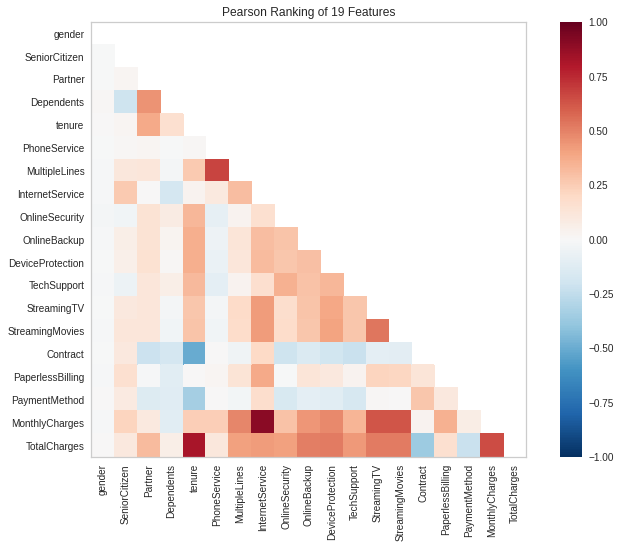

In [ ]:
# Criando uma Matriz de Correlação
from yellowbrick.features import Rank2D

X = df_clean.drop('Churn', axis=1)
y = df_clean.Churn

fig, ax = plt.subplots(figsize=(12,8))
pcv = Rank2D(features = X.columns, algorithm = 'pearson')
pcv.fit(X,y)
pcv.transform(X.to_numpy())
pcv.poof()
fig.tight_layout()

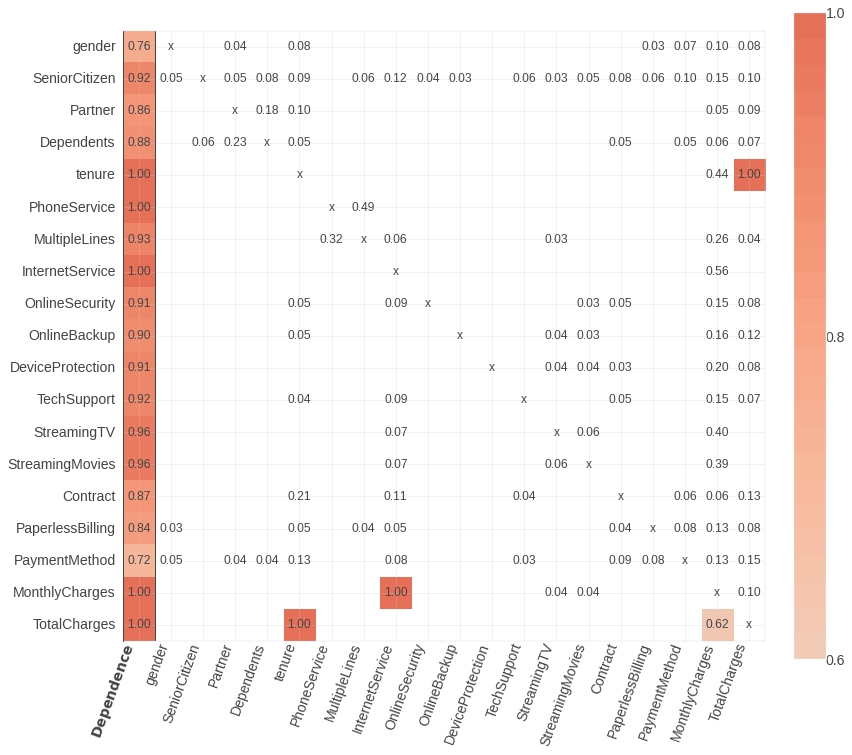

In [ ]:
# Padronizando dados
std = preprocessing.StandardScaler()
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=df_clean.drop('Churn',axis=1).columns)

# Aplicando rfpimp para verificar correlçaões
!pip install rfpimp -q
import rfpimp
rfpimp.plot_dependence_heatmap(
    rfpimp.feature_dependence_matrix(X_std),
    value_fontsize=12,
    label_fontsize=14,
    figsize=(12,12)
    )

fig = plt.gcf()
fig.tight_layout()

Podemos verificar que existem outras varíaveis que apresentam alta correlação como `TotalCharge`-`Tenure` e `MonthyCharges`-`InternetService`.



Assim como *features* com alta correlação são ruins, com baixa variância( perto de zero) também são, pois elas não acrescentam valor a nenhum modelo.

Então iremos localizar o(s) atributo(s) com variância abaixo de 0.1.

In [ ]:
# Feature com variância abaixo de 0.1
for i , v in enumerate(X.var()):
  if v < 0.1:
    print(X.columns[i],':',v)
  else:
    pass

PhoneService : 0.08736217586054987


`PhoneService` não irá gerar valor ao nosso modelo e deve ser removido do *dataset*.

Finalizando a fase de entendimento dos dados, vamos iniciar a limpeza do *dataset* e preparando os dados para treinamento.



#Data Preparation

Para começar a preparação dos dados vamos eliminar as variáveis que já foram mencionadas na fase de entendimento como variáveis ruins. São elas:


*   PhoneService - Não gera valor por apresentar baixa variância
*   MonthlyCharges - Apresenta alta correlação com `Internetservice`
*   TotalCharges - Apresenta alta correlação com `tenure`



In [ ]:
# Eliminando atributos ruins
df_final = df_clean.drop(['PhoneService','MonthlyCharges','TotalCharges'], axis=1)

Feito isso, uma técnica interessante para a eliminação de atributos fracos é a aplicação da RFE (Recursive Feature Elimination), da biblioteca Scikit-learn.

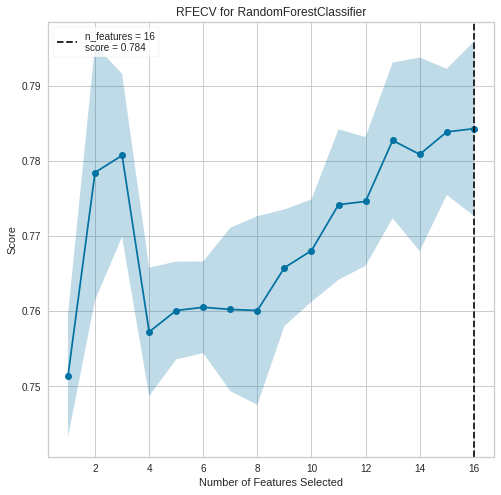

In [ ]:
# Aplicando RFE
from yellowbrick.features import RFECV

X = df_final.drop('Churn',axis=1)
y = df_final.Churn

fig, ax = plt.subplots(figsize=(8,8))
rfe= RFECV(RandomForestClassifier())
rfe.fit(X,y)
rfe.poof()
fig.tight_layout()

Foi feito uma RFE com uma *Random Forest* e verificou-se que com 16 *features* ainda temos uma melhora do modelo. Se houvesse algum atributo fraco a linha apresentaria uma pontuação constante.

Com todos os atributos que queremos, precisamos transforma-los em dados binários, de forma que consumam menos memória e que também possam ser modelados por classificadores lineares, como Regressão Logística e SVM (Suport Vector Machine). Nesse caso irei utilizar o OneHotEnconder com o atributo sparse verdadeiro para gerar uma matriz mais comprimida para valores igual a 0.

In [ ]:
# Lidando com dados categóricos com OneHotEnconder

features = [f for f in df_final.columns if f not in ("tenure","Churn")]

ohe = preprocessing.OneHotEncoder(sparse=True)

ohe.fit(df_final[features])

X = ohe.transform(df_final[features])
y = y.to_numpy() #deixando todos os dados no formato array

# Adicionando dados numéricos no formato sparse matrix
# Padronizando dados e tornando em array
tenure_std = std.fit_transform(df_final['tenure'].values.reshape(1,-1))
tenure_array = tenure_std[0][:,None]


# Inserindo dentro da matriz
from scipy.sparse import hstack
X = hstack([X,tenure_array])

In [ ]:
# Verificando o a matriz esparsa 
X

<7032x36 sparse matrix of type '<class 'numpy.float64'>'
	with 105480 stored elements in COOrdinate format>

Nesse momento encerramos a fase de preparação dos dados e podemos seguir para a criação do modelo!

# Modeling

Para definir uma baseline escolhi uma *Decision Tree* com classes balanceada para iniciar meu processo de modelagem.

Importante destacar o uso do `class_weight='balanced'` porque estamos lidando com um alvo desbalanceado. Além disso ressalto que a métrica de avaliação para dados desbalanceados, como dito anteriormente, será a **AUC**.


In [ ]:
# Instanciando modelo
model = DecisionTreeClassifier(class_weight='balanced')

# Dividindo dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Selecionando método de cross validation
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

# Aplicando Cross-Validation
scores = cross_val_score(model, X_train, y_train, cv=rskf, scoring="roc_auc", n_jobs=-1)

print("\n Scores: ", scores)
print("\n AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))


 Scores:  [0.65897065 0.6470193  0.66958666 0.66187426 0.65597282 0.65457077
 0.65542845 0.67033956 0.67100872]

 AUC: 0.661 (+/- 0.008)


Criamos o primeiro modelo com a pontuação de 0.660 de AUC e com menos de 0.01 de desvio-padrão. Essa baixa variância se dá pela aplicação do `RepeatedStratifiedFold`. Isso é importante para não criarmos um modelo superadequado.





Com o modelo base, vamos aplicar o mesmo proceso para diversos modelos e identificar aquele que apresenta um melhor *AUC*.

In [ ]:
# Aplicando diversos modelos
for model in [
              DummyClassifier,
              LogisticRegression,
              DecisionTreeClassifier,
              KNeighborsClassifier,
              SVC,
              RandomForestClassifier,
              xgboost.XGBClassifier]:

  cls = model()
  try:
    s = cross_val_score(cls,X_train,y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)
    print(
      f"{model.__name__:22} AUC: "
      f"{s.mean():.3f} STD: {s.std():.3f}"
  )
  except ValueError:
    pass

DummyClassifier        AUC: 0.498 STD: 0.010
LogisticRegression     AUC: 0.830 STD: 0.006
DecisionTreeClassifier AUC: 0.664 STD: 0.010
KNeighborsClassifier   AUC: 0.758 STD: 0.007
SVC                    AUC: 0.799 STD: 0.011
RandomForestClassifier AUC: 0.778 STD: 0.005
XGBClassifier          AUC: 0.828 STD: 0.007


De acordo com a nossa análise o modelo com Regressão Logística se saiu um pouco melhor que com XG Boost. Porém aplicamos modelos padrões, ou seja, sem hiperparâmetros.

O próximo passo é otimizar os hiperparâmetros.

Vou otimizar tanto a Regressão Logística quanto o XG Boost e ao final escolheremos o melhor modelo.



## Otimizando Hiperparâmetros

Para deixar o código mais rápido, vou utilizar uma Random Search e procurar de forma aleatória e automática os melhores parâmetros para o meu modelo.



### Regressão Logística

In [ ]:
#Random Search para Regressão Logística
classifier =  LogisticRegression(class_weight='balanced', n_jobs=-1)
param_grid = {
    'penalty': [i for i in ['l1','l2']],
    'C': [i for i in [0.001,0.01,0.1,1,10,100]],
    'max_iter': [i for i in [10,50,10,150,200]],
    'tol': [i for i in [0.0001,0.001,0.01]]
}

model = model_selection.RandomizedSearchCV(
    estimator=classifier,
    n_iter=20,
    scoring='roc_auc',
    cv=rskf,
    n_jobs=-1,
    verbose=10,
    param_distributions=param_grid
    )

model.fit(X_train,y_train)
print(f"\nBest score: {model.best_score_:}")

print('Best parameters set:')
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1166s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1946s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0234s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1973s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    2.5s



Best score: 0.8294684953446342
Best parameters set:
	 C: 10
	 max_iter: 150
	 penalty: l2
	 tol: 0.0001


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    2.8s finished


### XG Boost

In [ ]:
# Regressão Logística para XG Boost
classifier = xgboost.XGBClassifier(scale_pos_weight=2.762, n_jobs=-1)

param_grid = {
    'max_depth': [i for i in range(0,5)],
    'gamma': [i for i in [0,0.1,0.5,1]],
    'min_child_weight': [i for i in range(1,7,1)],
    'subsample': [i for i in [0,0.6,0.8,1]],
    'colsample_bytree': [i for i in [0,0.6,0.8,1]],
    'lambda': [i for i in [0, 0.5, 1]],
    'alpha': [i for i in [0, 0.5, 1]],
    'learning_rate': [i for i in [0.1, 0.01, 0.001]],
    'n_estimators:': [i for i in range(100,300,10)]
}

model = model_selection.RandomizedSearchCV(
    estimator=classifier,
    n_iter=20,
    scoring='roc_auc',
    cv=rskf,
    n_jobs=-1,
    verbose=10,
    param_distributions=param_grid
    )

model.fit(X_train,y_train)
print(f"\nBest score: {model.best_score_:}")

print('Best parameters set:')
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
  print(f"\t {param_name}: {best_parameters[param_name]}")

Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1629s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   20.0s finished



Best score: 0.8286968345582233
Best parameters set:
	 alpha: 1
	 colsample_bytree: 1
	 gamma: 1
	 lambda: 0.5
	 learning_rate: 0.01
	 max_depth: 4
	 min_child_weight: 6
	 n_estimators:: 290
	 subsample: 0.6


A Regressão não teve uma grande melhora no seu AUC, permanecendo próximo do 0.830, porém o XG Boost apresentou uma melhora atingindo uma pontuação de 0.830 também.

Dois modelos totalmente diferentes com a mesma pontuação, qual usar?

Para decidir vamos analisar mais duas métricas: *precision* e *recall*.

In [ ]:
# Intanciando o modelo
model_log = LogisticRegression(class_weight='balanced',n_jobs=-1, penalty='l2', C=10, max_iter=150, tol=0.0001)

# Aplicando Cross-Validation
scores_rec = cross_val_score(model_log, X_train, y_train, cv=rskf, scoring="recall")
scores_pres = cross_val_score(model_log, X_train, y_train, cv=rskf, scoring="precision")

print("Model: Regressão Logística")
print("Recall: %0.4f (+/- %0.2f)" % (scores_rec.mean(), scores_rec.std()))
print("Precision: %0.4f (+/- %0.2f)" % (scores_pres.mean(), scores_pres.std()))

Model: Regressão Logística
Recall: 0.7954 (+/- 0.01)
Precision: 0.4979 (+/- 0.01)


In [ ]:
# Intanciando o modelo
model_xg = xgboost.XGBClassifier(scale_pos_weight=2.762, max_depth=2, learning_rate=0.1, n_jobs=-1, min_child_weight=5, subsample=0.6, colsample_bytree=1, n_estimators=110, reg_alpha=0.5, gamma=0.1)

# Aplicando Cross-Validation
scores_rec = cross_val_score(model_xg, X_train, y_train, cv=rskf, scoring="recall")
scores_pres = cross_val_score(model_xg, X_train, y_train, cv=rskf, scoring="precision")

print("Model: XG boost")
print("Recall: %0.4f (+/- %0.2f)" % (scores_rec.mean(), scores_rec.std()))
print("Precision: %0.4f (+/- %0.2f)" % (scores_pres.mean(), scores_pres.std()))

Model: XG boost
Recall: 0.7877 (+/- 0.01)
Precision: 0.4957 (+/- 0.01)


A Regressão Logística apresentou um valor um pouco melhor para precisão e *recall*, vamos conferir se algum modelo sofreu overfitting.



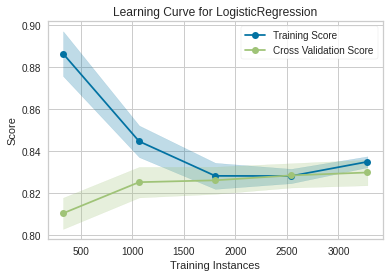

In [ ]:
# Aplicando Learning Curve para verificar overfitting
from yellowbrick.model_selection import LearningCurve
fig, ax= plt.subplots(figsize=(6,4))
lc3_viz= LearningCurve(LogisticRegression(class_weight='balanced',n_jobs=-1, penalty='l2', C=0.1, max_iter=50, tol=0.01), cv=rskf, scoring='roc_auc')

lc3_viz.fit(X_train,y_train)
lc3_viz.poof()
fig.tight_layout()

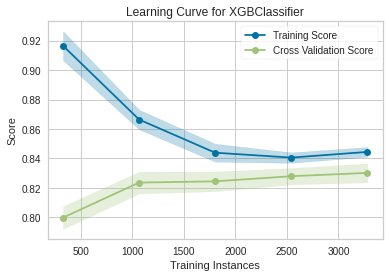

In [ ]:
# Aplicando Learning Curve para verificar overfitting
fig, ax= plt.subplots(figsize=(6,4))
lc3_viz= LearningCurve(xgboost.XGBClassifier(scale_pos_weight=2.762, max_depth=2, learning_rate=0.1, n_jobs=-1, min_child_weight=5, subsample=0.6, colsample_bytree=1, n_estimators=110, reg_alpha=0.5, gamma=0.1), cv=rskf, scoring='roc_auc')

lc3_viz.fit(X_train,y_train)
lc3_viz.poof()
fig.tight_layout()

Os dois modelos se comportaram bem quanto a superadequação.

No final, os dois modelos apresentaram padrões parecidos. Uma forma de diferenciar seria ir mais afundo no *dataset*, investindo mais tempo em *Feature Engineering* e em hiperparâmetros, poderiamos tentar aplicar uma redução da dimensionalidade ou até mesmo criar um *mix* entre os dois modelos aplicando um método *ensemble*.

De qualquer forma, neste caso, vou escolher a Regressão Logística porque apresentou resultados melhores e por ser um modelo simples.

" Não tente complicar coisas que podem ser resolvidas de uma maneira mais simples "

# Evaluation

In [ ]:
# Aplicando modelo final
model = LogisticRegression(class_weight='balanced',n_jobs=-1, penalty='l2', C=10, max_iter=150, tol=0.0001)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9044    0.6959    0.7866      1549
           1     0.4869    0.7968    0.6045       561

    accuracy                         0.7227      2110
   macro avg     0.6956    0.7464    0.6955      2110
weighted avg     0.7934    0.7227    0.7382      2110

Acurácia: 0.7227

AUC: 0.7464



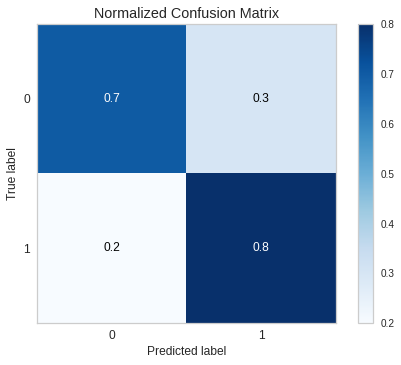

In [ ]:
# Avaliando modelo
!pip install -q scikit-plot
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Aplicando nosso modelo nos dados de teste que foram separados obtivemos um AUC de 0.7464, que é um bom resultado comparado com a baseline utilizando *Decision Tree*.

Analisando o resultado, temos um modelo que apresentou 80% de acerto ao identificar clientes que poderiam abandonar a empresa e um erro de 30% dos clientes que não abandonariam mas foram idenficados com potencial de *Churn*.

#Considerações Finais

As informações obtidas servem como um norte para as decisões da empresa. Quais técnicas de marketing serão utilizadas para manter os clientes, qual é o recurso humano e/ou financeiro que pode ser aplicado, sabendo que 30% de clientes serão beneficiados mesmo estando satisfeitos.

O trabalho do cientista de Dados está finalizado?

Não!

Aplicação de outras métricas para identificar quais *features* são mais importantes, busca por novas soluções, investimento no modelo através de outras técnicas comentadas na fase de modelagem, são os próximos passos além de acompanhar os resultados do modelo criado.

Espero que de forma resumida, tenha esclarecido alguns conceitos da utilização do Machine Learnging na resolução de problemas reais.